BOLD regressor prediction and convolution.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import wes
import seaborn as sns

# allow inline plotting in the notebook
%matplotlib inline
pal = wes._lib._cycles['FantasticFox']
sns.set_palette(pal)
sns.set_style('whitegrid')

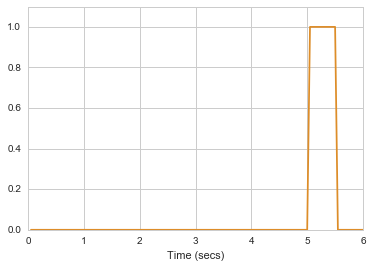

In [2]:
# preallocate our "activity" array with zeros
activity = np.zeros(2400)

# create a "time" array in a scale of seconds, for reference
t = np.arange(.05, 120.01, .05)

# the first stimulus is presented after 5 seconds, starting in step 101
# it lasts for 500 ms, or 10 steps of 50 ms
# it produces activity level 1.0
activity[(t>5) & (t<=5.5)] = 1

# we plot the early part (first 6 secs) of our activity array to check
plt.plot(t[0:120], activity[0:120])
plt.xlabel('Time (secs)')
plt.ylim((0, 1.1))
plt.show()

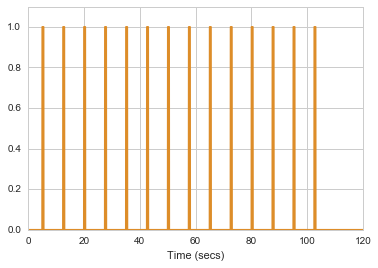

In [3]:
# we will loop trough 14 trials
for trial in range(14):
    # we need to calculate when to start presenting the stimulus
    stim_start = 5 + (trial * 7.5)
    # the stimulus end should be simply the start plus .5 secs
    stim_end = stim_start + .5
    activity[(t>stim_start) & (t<=stim_end)] = 1

# we plot the early part (first 6 secs) of our activity array to check
plt.plot(t, activity)
plt.xlabel('Time (secs)')
plt.ylim((0, 1.1))
plt.show()

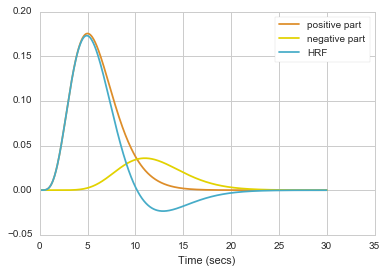

In [4]:
# the HRF is back to zero after about 30 seconds
hrf_t = np.arange(.05,30.05,.05)

# we use a gamma to create the positive part of the HRF
positive_hrf = gamma.pdf(hrf_t, 6)

# we use a different gamma to create the negative part of the HRF
# this component has smaller amplitude, so we scale it down
negative_hrf = 0.3*gamma.pdf(hrf_t, 12)

# we substract one from the other to the HRF
HRF = positive_hrf - negative_hrf

# let's plot the HRF and its components
plt.plot(hrf_t, positive_hrf, label="positive part")
plt.plot(hrf_t, negative_hrf, label="negative part")
plt.plot(hrf_t, HRF, label="HRF")
plt.xlabel("Time (secs)")
plt.legend(frameon=True)
plt.show()

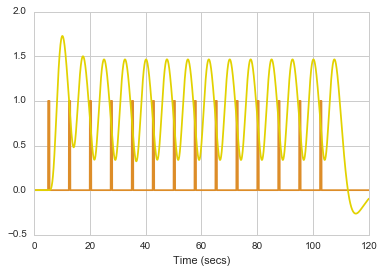

In [5]:
# convolution with numpy function
BOLD = np.convolve(activity, HRF)

# the convolved vector will have some extra points at the end
# we cut those out and set it to have the size of our activity vector
BOLD = BOLD[0:2400]
plt.plot(t, activity)
plt.plot(t, BOLD)
plt.xlabel("Time (secs)")
plt.show()

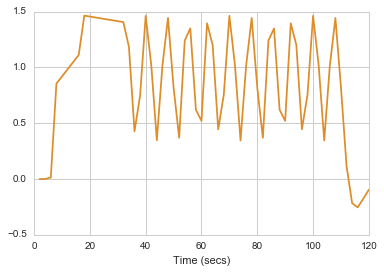

In [6]:
# keep only time steps that are multiples of 2
# we are assuming TR = 2 secs
BOLD = BOLD[np.mod(t, 2)==0]
t = t[np.mod(t, 2)==0]

# Plot the predictions again
plt.plot(t, BOLD)
plt.xlabel("Time (secs)")
plt.show()

In [7]:
# save a text file with our predictions
np.savetxt('predicted_BOLD.txt', BOLD)

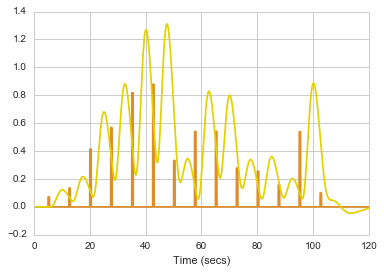

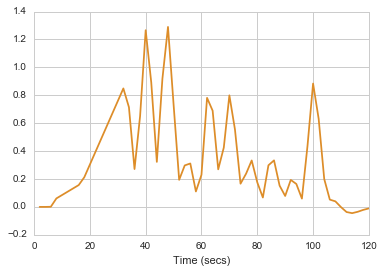

In [8]:
# preallocate activity array and create a time array
activity = np.zeros(2400)
t = np.arange(.05,120.05,.05)

# we will loop trough 14 trials
# each trial has a stimulus presented for 500 ms
# followed by a 7-second ISI
for trial in range(14):
    # we need to calculate when to start presenting the stimulus
    stim_start = 5 + (trial * 7.5)
    
    # the stimulus end should be simply the start plus .5 secs
    stim_end = stim_start + .5
    activity[(t>stim_start) & (t<=stim_end)] = np.random.uniform()

# convolution with numpy function
BOLD = np.convolve(activity, HRF)

# the convolved vector will have some extra points at the end
# we cut those out and set it to have the size of our activity vector
BOLD = BOLD[0:2400]
plt.plot(t, activity)
plt.plot(t, BOLD)
plt.xlabel("Time (secs)")
plt.show()

# keep only time steps that are multiples of 2
# we are assuming TR = 2 secs
BOLD = BOLD[np.mod(t,2)==0]
t = t[np.mod(t,2)==0]

# Plot the predictions again
plt.plot(t, BOLD)
plt.xlabel("Time (secs)")
plt.show()

# save a text file with our predictions
np.savetxt('predicted_BOLD.txt', BOLD)